In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [34]:
df= pd.read_csv(r"/content/CC GENERAL.csv")     # reading cc data set

df.head()                      # results top most rows in a data set

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [35]:
df.shape   

(8950, 18)

In [36]:
df.isnull().sum()    #checking any null values are present

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [37]:
mean1=df['CREDIT_LIMIT'].mean() 
mean2=df['MINIMUM_PAYMENTS'].mean()
df['CREDIT_LIMIT'].fillna(value=mean1, inplace=True)   # replacing null values with mean of a column
df['MINIMUM_PAYMENTS'].fillna(value=mean2, inplace=True)

In [38]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
df['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

In [32]:
X = df.drop(['TENURE','CUST_ID'],axis=1).values   # preprocessing the data by removing the columns
y = df['TENURE'].values

In [10]:
# performing PCA 
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X)   # pca is applied on the data set without output labels
# creating a data frame for the pca results
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
# adding a new column to the data frame
finalDf = pd.concat([principalDf, df[['TENURE']]], axis = 1)
finalDf   # printing the results

,principal component 1,principal component 2,TENURE
0,-4326.383979,921.566882,12
1,4118.916665,-2432.846346,12
2,1497.907641,-1997.578694,12
3,1394.548536,-1488.743453,12
4,-3743.351896,757.342657,12
...,...,...,...
8945,-4208.357725,1122.443291,6
8946,-4123.923788,951.683820,6
8947,-4379.443989,911.504583,6
8948,-4791.117531,1032.540961,6


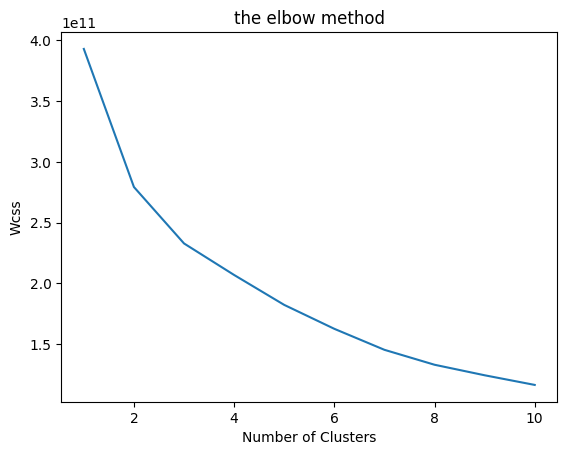

In [11]:
# Use the elbow method to find a good number of clusters with the K-Means algorithm

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [12]:
#  Calculate the silhouette score for the above clustering

nclusters = 3  # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(finalDf)       # fitting out kmeans model with our data set

y_cluster_kmeans = km.predict(finalDf)
from sklearn import metrics
score = metrics.silhouette_score(finalDf, y_cluster_kmeans)  
print(score)

0.5720391530020279


In [13]:
scaler = StandardScaler()      # feature scaling using standard scaler
X_Scale = scaler.fit_transform(X)

In [14]:
# performing pca
pca3 = PCA(n_components=2)
principalComponents1 = pca3.fit_transform(X_Scale)

principalDf1 = pd.DataFrame(data = principalComponents1, columns = ['principal component 1', 'principal component 2'])

finalDf2 = pd.concat([principalDf1, df[['TENURE']]], axis = 1)
finalDf2

,principal component 1,principal component 2,TENURE
0,-1.718894,-1.072946,12
1,-1.169317,2.509260,12
2,0.938415,-0.382593,12
3,-0.907506,0.045836,12
4,-1.637829,-0.684971,12
...,...,...,...
8945,-0.025276,-2.034126,6
8946,-0.233113,-1.656656,6
8947,-0.593880,-1.828116,6
8948,-2.007672,-0.673769,6


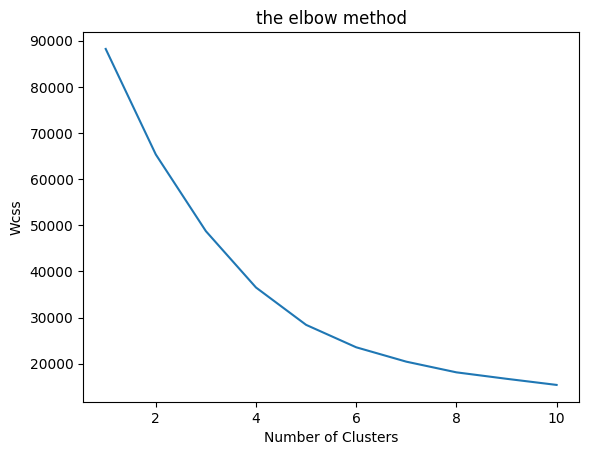

In [15]:
# Use the elbow method to find a good number of clusters with the K-Means algorithm

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(finalDf2)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [16]:
#  Calculate the silhouette score for the above clustering

nclusters = 3  # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(finalDf2)

y_cluster_kmeans = km.predict(finalDf2)
from sklearn import metrics
score = metrics.silhouette_score(finalDf2, y_cluster_kmeans)
print(score)

0.3836024693017323


In [18]:
df1= pd.read_csv(r"/content/pd_speech_features.csv")    # reading pd_speech_features csv file
df1.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [19]:
X = df1.drop('class',axis=1).values   # preprocessing the data
y = df1['class'].values

In [20]:
scaler = StandardScaler()    #performing feature selection
X_Scale = scaler.fit_transform(X)

In [21]:
# performing pca
pca4 = PCA(n_components=3)
principalComponents2 = pca4.fit_transform(X_Scale)

principalDf2 = pd.DataFrame(data = principalComponents2, columns = ['principal component 1', 'principal component 2', 
                                                                    'principal components 3'])
finalDf3 = pd.concat([principalDf2, df1[['class']]], axis = 1)
finalDf3

,principal component 1,principal component 2,principal components 3,class
0,-10.047372,1.471078,-6.846404,1
1,-10.637725,1.583751,-6.830979,1
2,-13.516185,-1.253541,-6.818698,1
3,-9.155084,8.833605,15.290896,1
4,-6.764470,4.611468,15.637117,1
...,...,...,...,...
751,22.322682,6.481913,1.458749,0
752,13.442877,1.449413,9.352290,0
753,8.270264,2.391290,-0.908673,0
754,4.011760,5.412260,-0.847134,0


In [22]:
# splitting our data into training and testing part
X_train, X_test, y_train, y_true = train_test_split(finalDf3[::-1], finalDf3['class'], test_size = 0.30, random_state = 0)

In [23]:
# training and predcting svm model on our data set
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Support Vector Machine's 
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_true))

              precision    recall  f1-score   support

           0       1.00      0.02      0.03        57
           1       0.75      1.00      0.86       170

    accuracy                           0.75       227
   macro avg       0.88      0.51      0.45       227
weighted avg       0.81      0.75      0.65       227

[[  1  56]
 [  0 170]]
accuracy is 0.7533039647577092


In [24]:
#Apply Linear Discriminant Analysis (LDA) on Iris.csv dataset to reduce dimensionality of data to k=2. 

In [25]:
df2= pd.read_csv("/content/Iris.csv")   # reading iris csv file
df2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
df2.isnull().any()   # checking null values

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [27]:
X = df2.iloc[:, 1:5].values   # preprocessing the data
y = df2.iloc[:, 5].values

In [28]:
# performing lda on the data set
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
LinearDA = lda.fit_transform(X, y)
LinearDf = pd.DataFrame(data = LinearDA, columns = ['LD 1', 'LD 2'])   # converting our results into a dataset
finalLda = pd.concat([LinearDf, df2[['Species']]], axis = 1)   # appending species column to the data frame
finalLda   

,LD 1,LD 2,Species
0,8.084953,0.328454,Iris-setosa
1,7.147163,-0.755473,Iris-setosa
2,7.511378,-0.238078,Iris-setosa
3,6.837676,-0.642885,Iris-setosa
4,8.157814,0.540639,Iris-setosa
...,...,...,...
145,-5.674013,1.661346,Iris-virginica
146,-5.197129,-0.365506,Iris-virginica
147,-4.981712,0.812973,Iris-virginica
148,-5.901486,2.320751,Iris-virginica


##Briefly identify the difference between PCA and LDA

**PCA vs LDA**
Both PCA and LDA are linear transformation techniques. However, PCA is an unsupervised while LDA is a supervised dimensionality reduction technique.

**Principal Component Analysis**
PCA summarizes the feature set without relying on the output. PCA tries to find the directions of the maximum variance in the dataset. In a large feature set, there are many features that are merely duplicate of the other features or have a high correlation with the other features. Such features are basically redundant and can be ignored. The role of PCA is to find such highly correlated or duplicate features and to come up with a new feature set where there is minimum correlation between the features or in other words feature set with maximum variance between the features. Since the variance between the features doesn't depend upon the output, therefore PCA doesn't take the output labels into account.

**Linear Discriminant Analysis**
LDA tries to reduce dimensions of the feature set while retaining the information that discriminates output classes. LDA tries to find a decision boundary around each cluster of a class. It then projects the data points to new dimensions in a way that the clusters are as separate from each other as possible and the individual elements within a cluster are as close to the centroid of the cluster as possible. The new dimensions are ranked on the basis of their ability to maximize the distance between the clusters and minimize the distance between the data points within a cluster and their centroids. These new dimensions form the linear discriminants of the feature set.
